In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import MCS as MCS
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd 
from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint
from numpy import argmax
from scipy import stats

/tmp/ipykernel_85557/3470145823.py:17: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS as MCS


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [3]:
train_data= pd.read_csv("../Train_data_liv_tox_18636.csv")

In [4]:
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,1,0,0,0,...,8.355850,10.869311,98.746533,558.183853,8.587444,5797.0,69.0,222.0,271.0,8.472222
1,CN(C)CCCC1c2ccccc2Nc2ccc(Cl)cc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,0.000000,10.024244,55.050898,300.139326,7.146174,896.0,33.0,110.0,129.0,4.611111
2,NC(N)=Nc1nc(CSCCN=CNS(=O)(=O)c2ccc(Br)cc2)cs1,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,6.555357,9.844533,73.704745,475.975849,11.069206,2264.0,32.0,126.0,139.0,5.791667
3,O=c1[nH]c(=O)n([C@@H]2O[C@H](CO)[C@@H](O)[C@@H...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,7.002156,9.881191,65.574603,371.961848,13.284352,573.0,30.0,94.0,113.0,4.000000
4,CN1CCCC(CN2c3ccccc3Sc3ccccc32)C1,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip...",LivTox,0,0,0,0,0,...,0.000000,10.137017,56.550528,310.150370,7.048872,982.0,36.0,120.0,143.0,4.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15075,C[C@@H](c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,1,0,0,0,...,6.259581,10.241209,73.142299,349.115045,8.951668,1359.0,41.0,132.0,157.0,5.458333
15076,COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,0,0,0,0,...,7.669962,10.959036,84.585213,428.147118,7.784493,2102.0,69.0,184.0,237.0,6.513889
15077,CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,1,1,0,0,...,0.000000,10.360058,70.097297,473.263819,6.858896,4012.0,50.0,168.0,194.0,7.833333
15078,C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...,0,16,Reactive Metabolite Mazzolari et al,LivTox,0,0,0,0,0,...,8.945724,11.424389,108.553825,648.293448,7.124104,6986.0,109.0,278.0,362.0,10.138889


In [5]:
mfp_features = train_data.columns[5:2053]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2054:2220]
physicochemical_features= train_data.columns[2220:2235]
mordred_features= train_data.columns[2235:]
identifiers = train_data.columns[:5]

In [6]:
maccs_features

Index(['MACCS1', 'MACCS2', 'MACCS3', 'MACCS4', 'MACCS5', 'MACCS6', 'MACCS7',
       'MACCS8', 'MACCS9', 'MACCS10',
       ...
       'MACCS157', 'MACCS158', 'MACCS159', 'MACCS160', 'MACCS161', 'MACCS162',
       'MACCS163', 'MACCS164', 'MACCS165', 'MACCS166'],
      dtype='object', length=166)

In [7]:
mfp_features

Index(['Mfp0', 'Mfp1', 'Mfp2', 'Mfp3', 'Mfp4', 'Mfp5', 'Mfp6', 'Mfp7', 'Mfp8',
       'Mfp9',
       ...
       'Mfp2038', 'Mfp2039', 'Mfp2040', 'Mfp2041', 'Mfp2042', 'Mfp2043',
       'Mfp2044', 'Mfp2045', 'Mfp2046', 'Mfp2047'],
      dtype='object', length=2048)

In [8]:
physicochemical_features

Index(['PSA', 'n_rot_bonds', 'n_rings', 'n_ar_rings', 'n_HBA', 'n_HBD', 'Fsp3',
       'logP', 'NHOHCount', 'NOCount', 'NumHeteroatoms', 'n_positive',
       '_n_negative', 'n_ring_asmbl', 'n_stereo'],
      dtype='object')

In [9]:
mordred_features

Index(['ABC', 'ABCGG', 'nAcid', 'nBase', 'nAromAtom', 'nAromBond', 'nAtom',
       'nHeavyAtom', 'nSpiro', 'nBridgehead',
       ...
       'SRW09', 'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1',
       'Zagreb2', 'mZagreb2'],
      dtype='object', length=595)

In [10]:
identifiers

Index(['smiles_r', 'TOXICITY', 'Source_rank', 'Source', 'Data'], dtype='object')

In [11]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
selected_mfp_Features = fs_variance(train_data[mfp_features], threshold=0.05)
selected_maccs_Features = fs_variance(train_data[maccs_features], threshold=0.10)
selected_mordred_features = fs_variance(train_data[mordred_features], threshold=0.10)

print(len(selected_mfp_Features))
print(len(selected_maccs_Features))
print(len(selected_mordred_features))

93
100
346


In [12]:
print(len(list(identifiers)))
print(len(list(selected_mordred_features)))
print(len(list(selected_mfp_Features)))
print(len(list(selected_maccs_Features)))
print(len(list(physicochemical_features)))

5
346
93
100
15


In [13]:
all_features = list(identifiers)+ list(selected_mordred_features)  +list(selected_mfp_Features)+  list(selected_maccs_Features)+  list(physicochemical_features)
all_features

['smiles_r',
 'TOXICITY',
 'Source_rank',
 'Source',
 'Data',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 

In [14]:
len(all_features)

559

In [15]:
train_data = train_data[all_features]

In [16]:
for i in train_data.Source_rank.unique():
    
    print(i)
    print(train_data[train_data["Source_rank"]==i]["TOXICITY"].value_counts()[1])
    #print(len(train_data[train_data["Source_rank"]==i])

2
77
3
933
5
203
6
410
7
2112
8
466
10
71
11
286
14
354
15
874
16
118


In [17]:
train_data[["Source_rank","Source"]].drop_duplicates().reset_index(drop=True)

,Source_rank,Source
0,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,3,"human hepatotoxicity, hepatobiallry, literaty..."
2,5,"rats, chronic oral administration, Hepatic his..."
3,6,"hepatocellular hypertrophy, rats, ORAD, HESS, ..."
4,7,Preclinical hepatotoxicity data from PharmaPen...
5,8,"large-scale and diverse DILI dataset, Shuaibin..."
6,10,US drug-induced liver injury network (DILIN) ...
7,11,"transient liver function abnormalities, advers..."
8,11,"HLADE, five serum enzyme markers of liver toxi..."
9,14,BESP Bile Salt Export Pump Inhibition


In [18]:
from collections import Counter

In [19]:
all_sources_list = [ 2,  3,  5,  6,  7,  8,  10, 11, 14, 15, 16]
all_sources_list

[2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16]

In [20]:
#Predict all other datasets with models built on one of the individual Liv datasets

list_of_lists=[]
import pickle

for i in all_sources_list: 
    
    print(i)
    
    classifier = pickle.load(open(f"../bestlivmodel_{i}_model.sav", 'rb'))
    
    for j in all_sources_list:
        
        print(j)
        
        df_heldouttest = train_data[train_data["Source_rank"]==j]
        y_heldouttest = np.array(df_heldouttest['TOXICITY'])
   
        features_heldouttest= df_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)
        feature_list_heldouttest = list(features_heldouttest.columns)
        X_heldouttest = np.array(features_heldouttest)

    
        print(len(X_heldouttest[0]))
        print(len(y_heldouttest))
        print('y_heldouttest dataset shape %s' % Counter(y_heldouttest))

        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
        cross_val_prob_cp = cross_val_predict(classifier, X_heldouttest, y_heldouttest, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_heldouttest, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))
    
        #Comapre for held out test set
        y_proba = classifier.predict_proba(X_heldouttest)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ]

        print(len(y_proba))
        print(len(y_heldouttest))
        print(len(y_pred))
        
        conf_matrix = confusion_matrix(y_heldouttest, y_pred)
        print(conf_matrix)
        print(classification_report(y_heldouttest, y_pred))
        ba= balanced_accuracy_score(y_heldouttest, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc= matthews_corrcoef(y_heldouttest, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print(Sensitivity)
        print(Specificity)
        auc=roc_auc_score(y_heldouttest, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        #best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
        # plot the roc curve for the model
        #plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        #plt.xlabel('False Positive Rate')
        #plt.ylabel('True Positive Rate')
        #plt.legend()
        #plt.show()  
        
        row = [i, j, ba, mcc, auc, Sensitivity, Specificity]
        list_of_lists.append(row)
    

2
2
554
103
y_heldouttest dataset shape Counter({1: 77, 0: 26})
Best Threshold=0.563938
103
103
103
[[26  0]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        26
           1       1.00      0.92      0.96        77

    accuracy                           0.94       103
   macro avg       0.91      0.96      0.93       103
weighted avg       0.95      0.94      0.94       103

balanced_accuracy_score  0.961038961038961
matthews_corrcoef  0.8655566484571138
1.0
0.922077922077922
roc_auc_score 0.9935064935064934
3
554
1582
y_heldouttest dataset shape Counter({1: 933, 0: 649})
Best Threshold=0.544679
1582
1582
1582
[[252 397]
 [174 759]]
              precision    recall  f1-score   support

           0       0.59      0.39      0.47       649
           1       0.66      0.81      0.73       933

    accuracy                           0.64      1582
   macro avg       0.62      0.60      0.60      1582
weighted avg       

Best Threshold=0.560109
738
738
738
[[190 138]
 [212 198]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52       328
           1       0.59      0.48      0.53       410

    accuracy                           0.53       738
   macro avg       0.53      0.53      0.53       738
weighted avg       0.54      0.53      0.53       738

balanced_accuracy_score  0.5310975609756097
matthews_corrcoef  0.06205867640948547
0.5792682926829268
0.48292682926829267
roc_auc_score 0.5214455681142177
7
554
2750
y_heldouttest dataset shape Counter({1: 2112, 0: 638})
Best Threshold=0.762821
2750
2750
2750
[[ 556   82]
 [1643  469]]
              precision    recall  f1-score   support

           0       0.25      0.87      0.39       638
           1       0.85      0.22      0.35      2112

    accuracy                           0.37      2750
   macro avg       0.55      0.55      0.37      2750
weighted avg       0.71      0.37      0.36      2750



Best Threshold=0.475004
143
143
143
[[60 12]
 [60 11]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62        72
           1       0.48      0.15      0.23        71

    accuracy                           0.50       143
   macro avg       0.49      0.49      0.43       143
weighted avg       0.49      0.50      0.43       143

balanced_accuracy_score  0.49413145539906106
matthews_corrcoef  -0.01597354416165376
0.8333333333333334
0.15492957746478872
roc_auc_score 0.4285993740219092
11
554
556
y_heldouttest dataset shape Counter({1: 286, 0: 270})
Best Threshold=0.440926
556
556
556
[[220  50]
 [212  74]]
              precision    recall  f1-score   support

           0       0.51      0.81      0.63       270
           1       0.60      0.26      0.36       286

    accuracy                           0.53       556
   macro avg       0.55      0.54      0.49       556
weighted avg       0.55      0.53      0.49       556

balanced_a

Best Threshold=0.310341
6111
6111
6111
[[1020 4217]
 [  83  791]]
              precision    recall  f1-score   support

           0       0.92      0.19      0.32      5237
           1       0.16      0.91      0.27       874

    accuracy                           0.30      6111
   macro avg       0.54      0.55      0.30      6111
weighted avg       0.82      0.30      0.31      6111

balanced_accuracy_score  0.5499011609438038
matthews_corrcoef  0.0908484939522668
0.19476799694481572
0.9050343249427918
roc_auc_score 0.5981515086501653
16
554
502
y_heldouttest dataset shape Counter({0: 384, 1: 118})
Best Threshold=0.375545
502
502
502
[[ 94 290]
 [ 32  86]]
              precision    recall  f1-score   support

           0       0.75      0.24      0.37       384
           1       0.23      0.73      0.35       118

    accuracy                           0.36       502
   macro avg       0.49      0.49      0.36       502
weighted avg       0.62      0.36      0.36       502

ba

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Best Threshold=0.637062
103
103
103
[[25  1]
 [49 28]]
              precision    recall  f1-score   support

           0       0.34      0.96      0.50        26
           1       0.97      0.36      0.53        77

    accuracy                           0.51       103
   macro avg       0.65      0.66      0.51       103
weighted avg       0.81      0.51      0.52       103

balanced_accuracy_score  0.6625874125874126
matthews_corrcoef  0.31407552411853334
0.9615384615384616
0.36363636363636365
roc_auc_score 0.8386613386613386
3
554
1582
y_heldouttest dataset shape Counter({1: 933, 0: 649})
Best Threshold=0.586045
1582
1582
1582
[[493 156]
 [609 324]]
              precision    recall  f1-score   support

           0       0.45      0.76      0.56       649
           1       0.68      0.35      0.46       933

    accuracy                           0.52      1582
   macro avg       0.56      0.55      0.51      1582
weighted avg       0.58      0.52      0.50      1582

balanced_

Best Threshold=0.538290
738
738
738
[[254  74]
 [320  90]]
              precision    recall  f1-score   support

           0       0.44      0.77      0.56       328
           1       0.55      0.22      0.31       410

    accuracy                           0.47       738
   macro avg       0.50      0.50      0.44       738
weighted avg       0.50      0.47      0.42       738

balanced_accuracy_score  0.4969512195121951
matthews_corrcoef  -0.007287979325209718
0.774390243902439
0.21951219512195122
roc_auc_score 0.545523497917906
7
554
2750
y_heldouttest dataset shape Counter({1: 2112, 0: 638})
Best Threshold=0.660124
2750
2750
2750
[[ 577   61]
 [1883  229]]
              precision    recall  f1-score   support

           0       0.23      0.90      0.37       638
           1       0.79      0.11      0.19      2112

    accuracy                           0.29      2750
   macro avg       0.51      0.51      0.28      2750
weighted avg       0.66      0.29      0.23      2750



Best Threshold=0.464444
143
143
143
[[45 27]
 [29 42]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62        72
           1       0.61      0.59      0.60        71

    accuracy                           0.61       143
   macro avg       0.61      0.61      0.61       143
weighted avg       0.61      0.61      0.61       143

balanced_accuracy_score  0.608274647887324
matthews_corrcoef  0.2166764906730014
0.625
0.5915492957746479
roc_auc_score 0.638302034428795
11
554
556
y_heldouttest dataset shape Counter({1: 286, 0: 270})
Best Threshold=0.464017
556
556
556
[[239  31]
 [ 10 276]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       270
           1       0.90      0.97      0.93       286

    accuracy                           0.93       556
   macro avg       0.93      0.93      0.93       556
weighted avg       0.93      0.93      0.93       556

balanced_accuracy_score  0.92

Best Threshold=0.272552
6111
6111
6111
[[3235 2002]
 [ 189  685]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      5237
           1       0.25      0.78      0.38       874

    accuracy                           0.64      6111
   macro avg       0.60      0.70      0.57      6111
weighted avg       0.85      0.64      0.70      6111

balanced_accuracy_score  0.7007364645767726
matthews_corrcoef  0.2831734673989655
0.617720068741646
0.7837528604118993
roc_auc_score 0.7540552633545241
16
554
502
y_heldouttest dataset shape Counter({0: 384, 1: 118})
Best Threshold=0.362384
502
502
502
[[180 204]
 [ 61  57]]
              precision    recall  f1-score   support

           0       0.75      0.47      0.58       384
           1       0.22      0.48      0.30       118

    accuracy                           0.47       502
   macro avg       0.48      0.48      0.44       502
weighted avg       0.62      0.47      0.51       502

bala

Best Threshold=0.613942
1582
1582
1582
[[622  27]
 [911  22]]
              precision    recall  f1-score   support

           0       0.41      0.96      0.57       649
           1       0.45      0.02      0.04       933

    accuracy                           0.41      1582
   macro avg       0.43      0.49      0.31      1582
weighted avg       0.43      0.41      0.26      1582

balanced_accuracy_score  0.49098869230756526
matthews_corrcoef  -0.051169581789876684
0.9583975346687211
0.023579849946409433
roc_auc_score 0.4247097934492343
5
554
602
y_heldouttest dataset shape Counter({0: 399, 1: 203})
Best Threshold=0.355763
602
602
602
[[241 158]
 [160  43]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       399
           1       0.21      0.21      0.21       203

    accuracy                           0.47       602
   macro avg       0.41      0.41      0.41       602
weighted avg       0.47      0.47      0.47       602

ba

In [21]:
results  = pd.DataFrame(list_of_lists, columns=["i", "j", "ba", "mcc", "auc", "Sensitivity", "Specificity"])
results

,i,j,ba,mcc,auc,Sensitivity,Specificity
0,2,2,0.961039,0.865557,0.993506,1.000000,0.922078
1,2,3,0.600897,0.223763,0.665222,0.388290,0.813505
2,2,5,0.614597,0.263326,0.728891,0.293233,0.935961
3,2,6,0.542073,0.088432,0.560113,0.384146,0.700000
4,2,7,0.536728,0.062064,0.541535,0.536050,0.537405
...,...,...,...,...,...,...,...
116,16,10,0.479167,-0.145365,0.366002,0.958333,0.000000
117,16,11,0.542567,0.152953,0.626548,0.959259,0.125874
118,16,14,0.495680,-0.037888,0.479991,0.982885,0.008475
119,16,15,0.402007,-0.137244,0.364680,0.464197,0.339817


auc


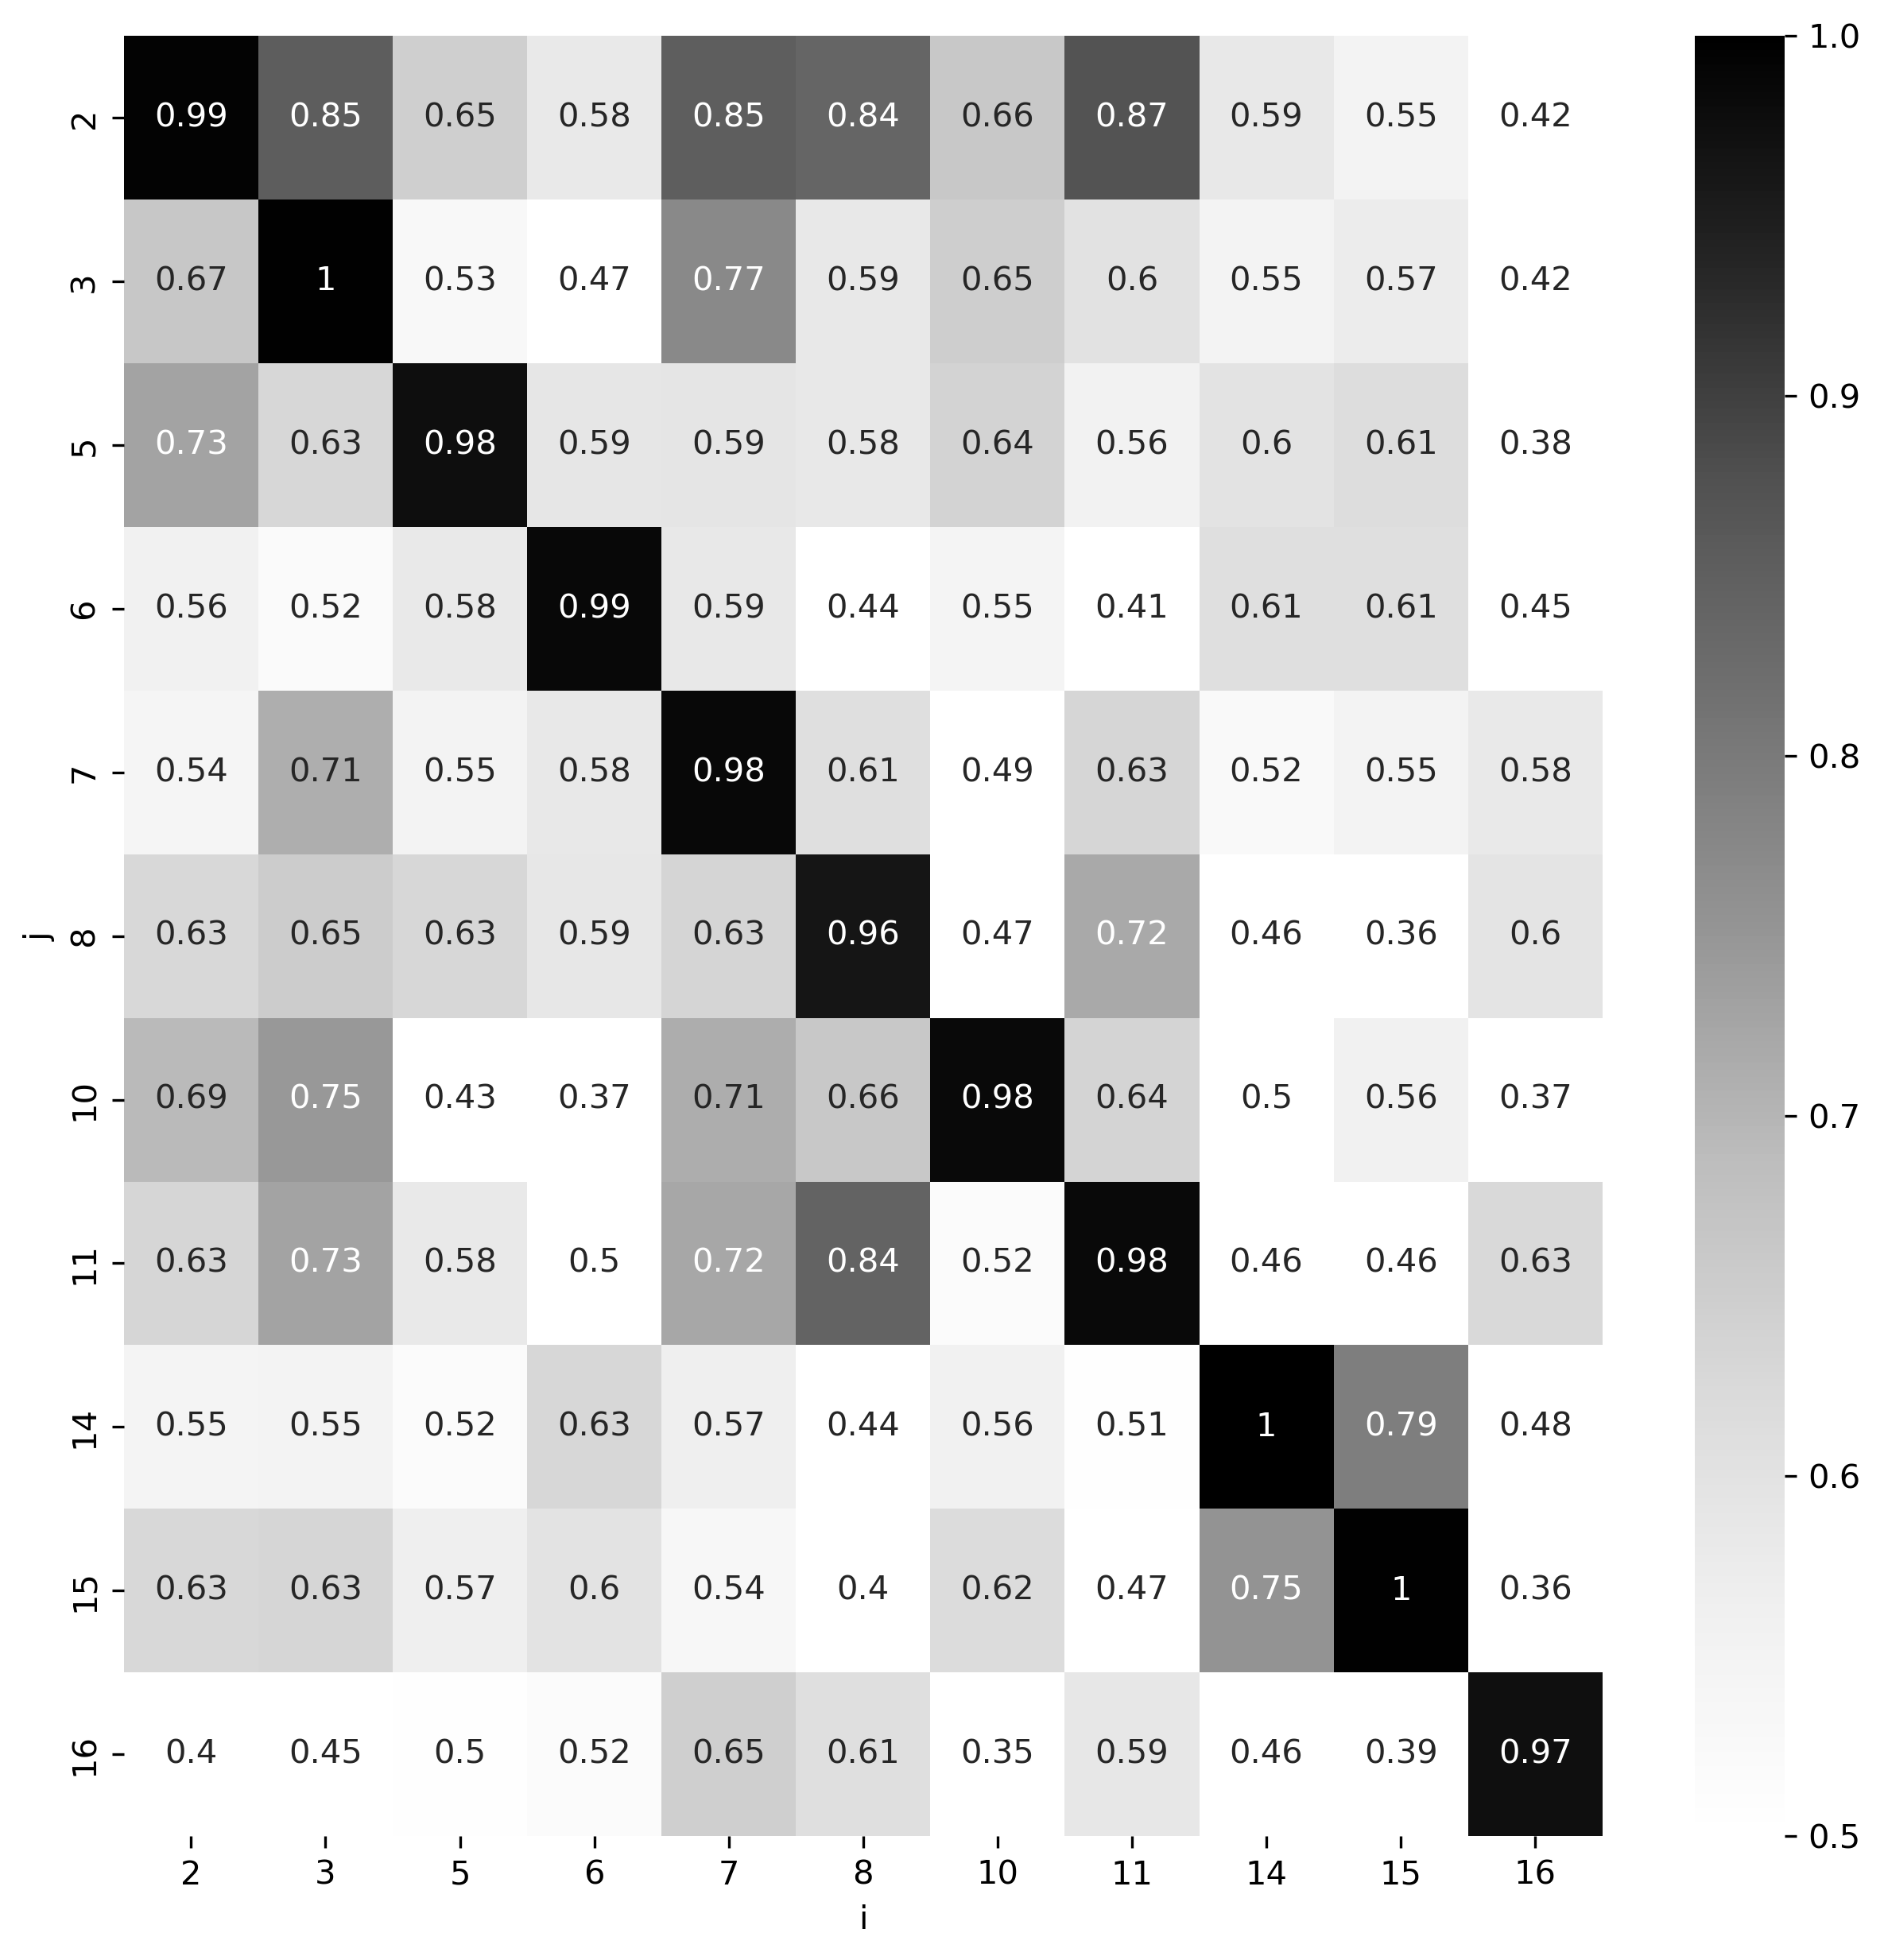

ba


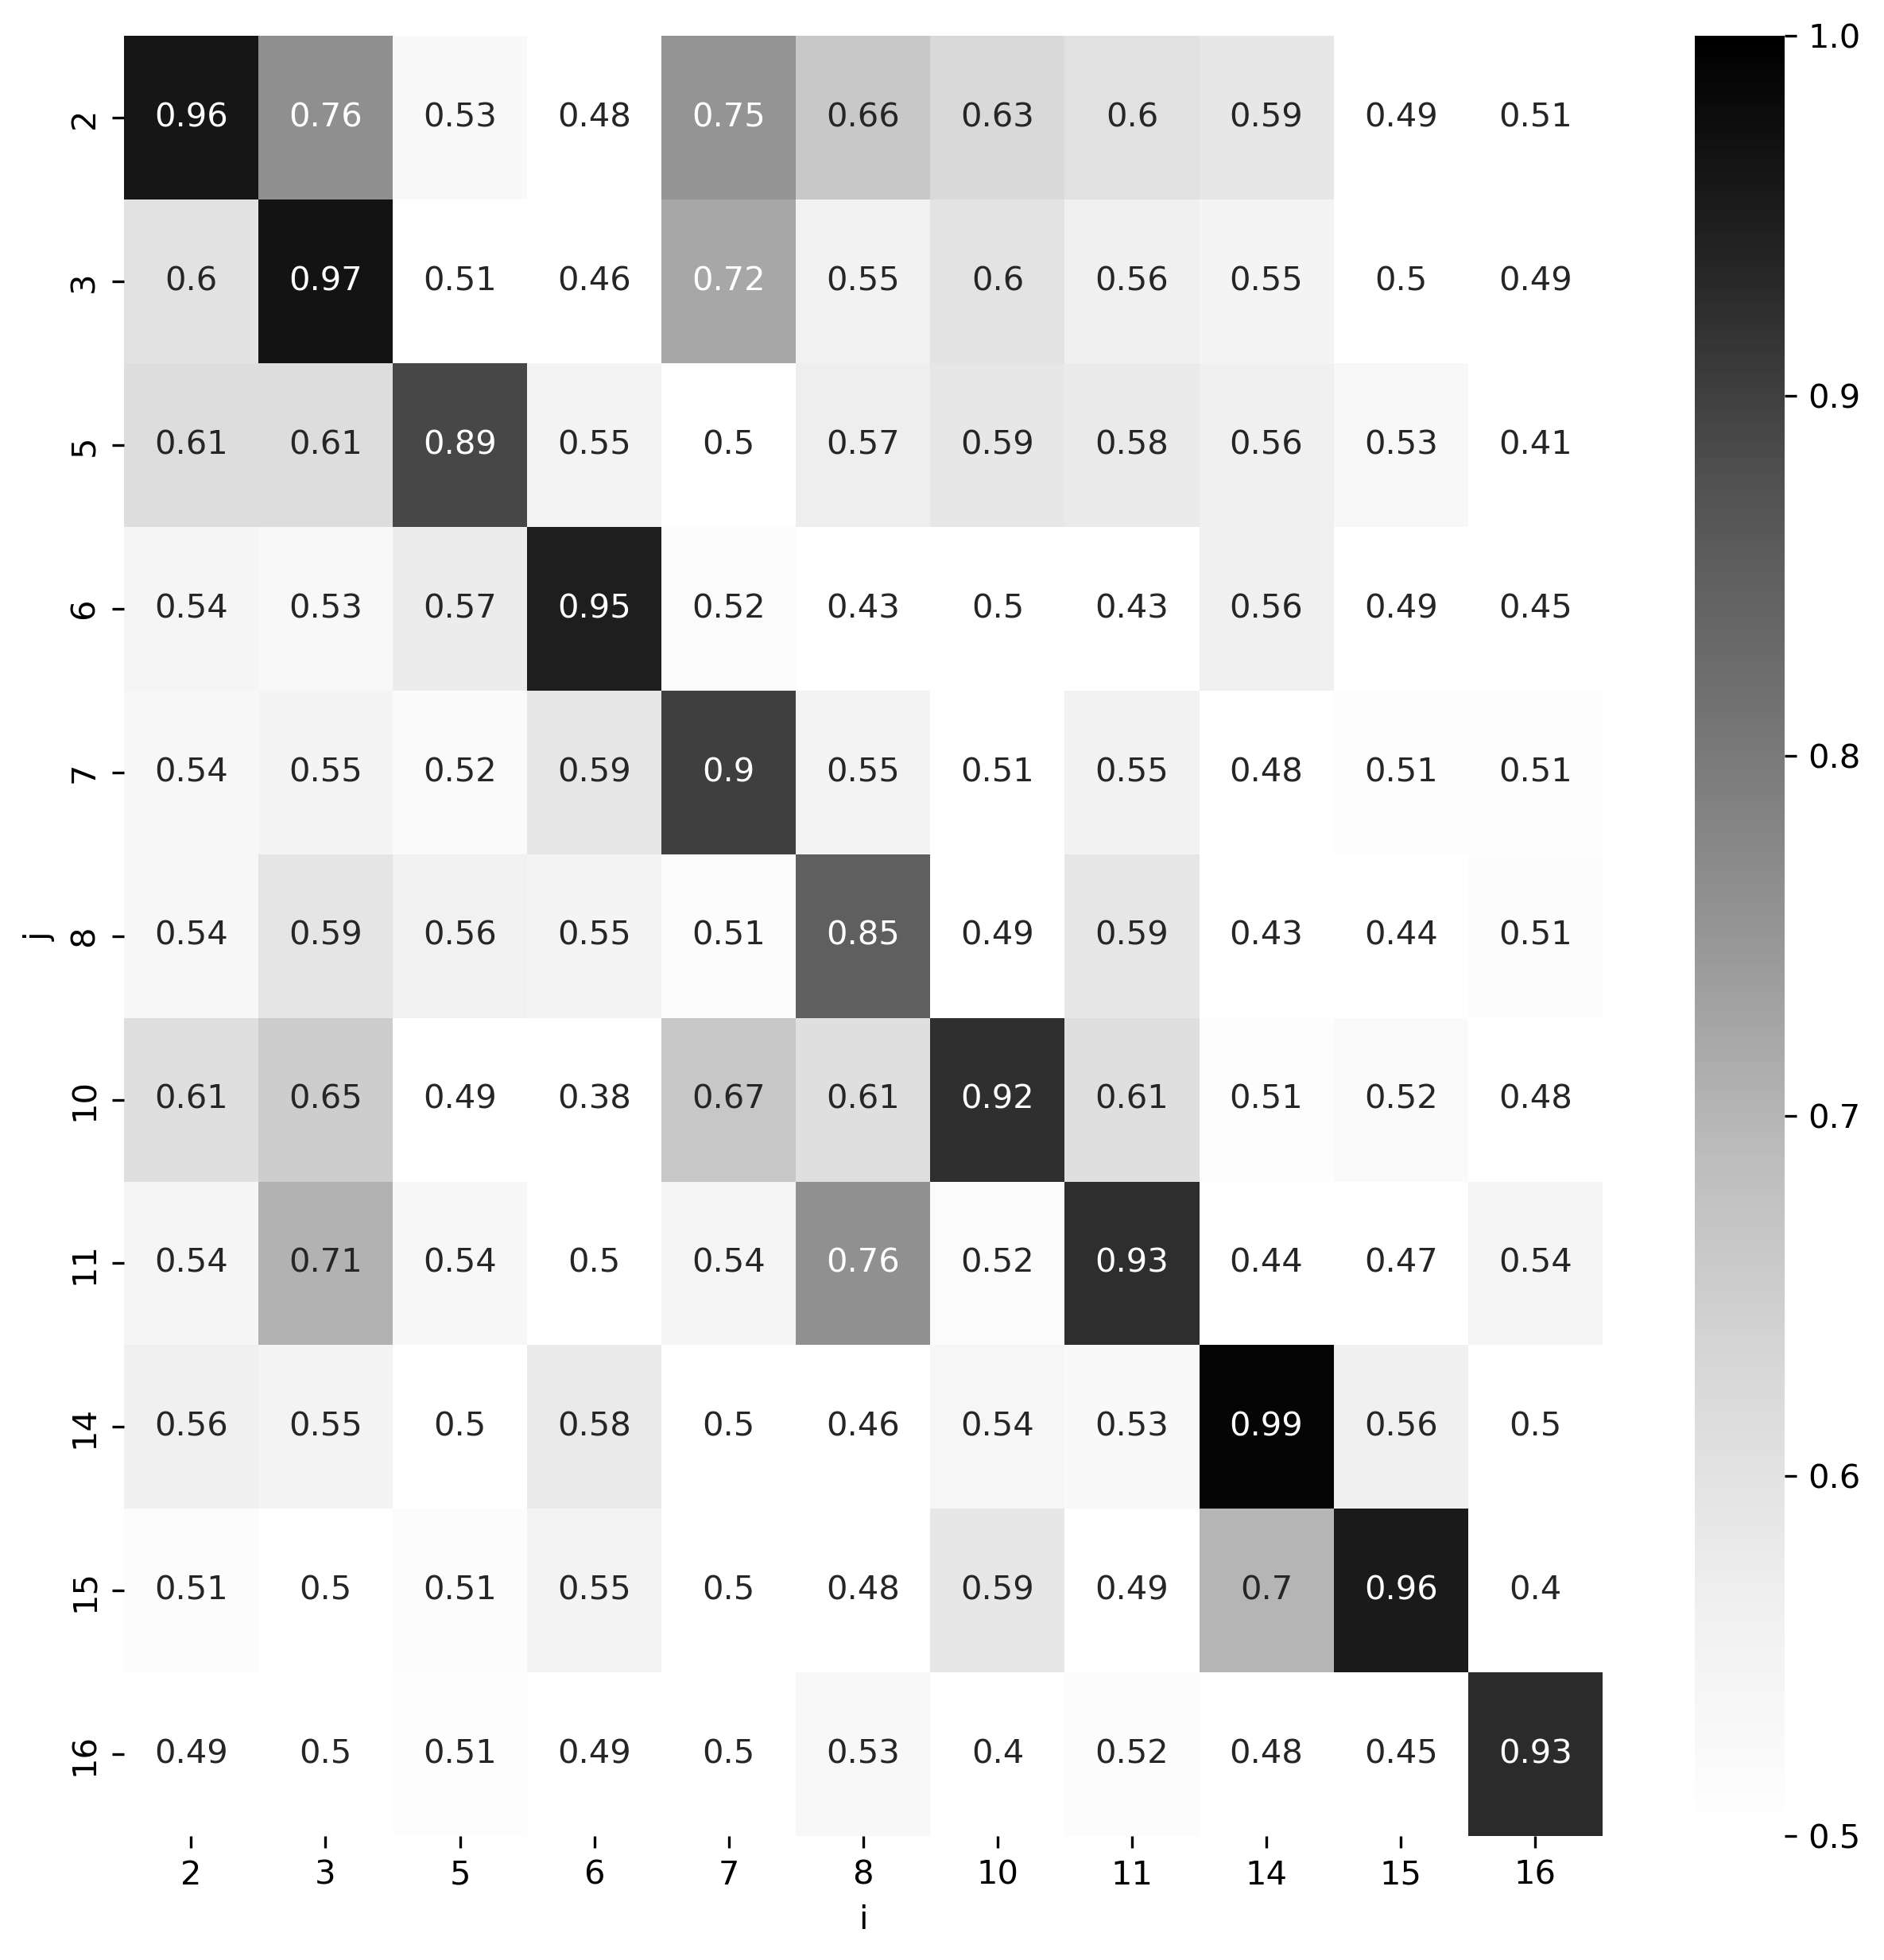

In [23]:
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["auc", "ba"]:
    heatmap = results.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    sns.heatmap(heatmap, cmap="Greys", vmin=0.50, vmax=1.00, annot=True)
    print(metric)
    plt.show()

In [24]:
test_data_ncv= pd.read_csv("../test_data_ncv_DILIst_1020.csv")

test_data_ncv = test_data_ncv[all_features]

y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [25]:
test_data_heldouttest= pd.read_csv("../test_data_heldouttest_DILIst_255.csv")

test_data_heldouttest = test_data_heldouttest[all_features]

y_diliheldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_diliheldouttest = np.array(test_features)

In [26]:
#Predict all DILI with models built on one of the individual Liv datasets

list_of_lists=[]
import pickle

for i in all_sources_list: 
    
    print(i)
    
    classifier = pickle.load(open(f"../bestlivmodel_{i}_model.sav", 'rb'))
    

    #Find best threshold using NCV DIlI compounds
    cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
    # get the best threshold
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    
    #Comapre for held out test set
    y_proba = classifier.predict_proba(X_diliheldouttest)[:,1]
    y_pred  = [ 1 if x>best_thresh  else 0 for x in y_proba ]

    conf_matrix = confusion_matrix(y_diliheldouttest, y_pred)
    print(conf_matrix)
    print(classification_report(y_diliheldouttest, y_pred))
    ba= balanced_accuracy_score(y_diliheldouttest, y_pred)
    print('balanced_accuracy_score ',ba)
    mcc= matthews_corrcoef(y_diliheldouttest, y_pred)
    print('matthews_corrcoef ',mcc)

    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    # Specificity or true negative rate
    Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
    print(Sensitivity)
    print(Specificity)
    auc=roc_auc_score(y_diliheldouttest, y_proba)
    print("roc_auc_score", auc)    
    
    row = [i, ba, mcc, auc, Sensitivity, Specificity, np.array(y_pred), np.array(y_proba)]
    list_of_lists.append(row)

2
Best Threshold=0.632511
[[ 48  43]
 [ 46 118]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        91
           1       0.73      0.72      0.73       164

    accuracy                           0.65       255
   macro avg       0.62      0.62      0.62       255
weighted avg       0.65      0.65      0.65       255

balanced_accuracy_score  0.6234923612972394
matthews_corrcoef  0.24526515151482778
0.5274725274725275
0.7195121951219512
roc_auc_score 0.6718708121147146
3
Best Threshold=0.705417
[[62 29]
 [84 80]]
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        91
           1       0.73      0.49      0.59       164

    accuracy                           0.56       255
   macro avg       0.58      0.58      0.55       255
weighted avg       0.62      0.56      0.56       255

balanced_accuracy_score  0.5845617796837309
matthews_corrcoef  0.16377856196254484
0.6813186813186

In [27]:
results  = pd.DataFrame(list_of_lists, columns=["i", "ba", "mcc", "auc", "Sensitivity", "Specificity",  "y_pred", "y_proba"])
results

,i,ba,mcc,auc,Sensitivity,Specificity,y_pred,y_proba
0,2,0.623492,0.245265,0.671871,0.527473,0.719512,"[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.30525258157812013, 0.8063894956409088, 0.58..."
1,3,0.584562,0.163779,0.631600,0.681319,0.487805,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, ...","[0.4990937301232923, 0.5678090599372747, 0.551..."
2,5,0.498760,-0.006813,0.558362,0.967033,0.030488,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.22034974012977485, 0.6410959908942325, 0.09..."
3,6,0.484689,-0.051211,0.508376,0.890110,0.079268,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.2887078566941651, 0.778160388701243, 0.4228..."
4,7,0.620410,0.247810,0.668789,0.472527,0.768293,"[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0.5422747063421852, 0.8559553423605252, 0.430..."
5,8,0.548713,0.123525,0.621415,0.890110,0.207317,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...","[0.33271492494199956, 0.5056573316773607, 0.46..."
6,10,0.552332,0.116886,0.624497,0.824176,0.280488,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0.29418079335129554, 0.47976943515060466, 0.5..."
7,11,0.535915,0.097706,0.631734,0.901099,0.170732,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.25375046194665357, 0.5072224760577094, 0.41..."
8,14,0.561445,0.127317,0.598030,0.769231,0.353659,"[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0.026996581115675888, 0.8917072367808511, 0.2..."
9,15,0.498157,-0.012734,0.607679,0.978022,0.018293,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0.06780071002464581, 0.30672107473744314, 0.1..."


In [28]:
list_of_lists_jaccard=[]
from sklearn.metrics import jaccard_score

for i in all_sources_list:
    for j in all_sources_list:
        jacccard = jaccard_score(results[results["i"]==i]["y_pred"].iloc[0], results[results["i"]==j]["y_pred"].iloc[0])
        row = [i, j, jacccard]
        list_of_lists_jaccard.append(row)

In [29]:
jaccard_df = pd.DataFrame(list_of_lists_jaccard, columns=["i", "j", "jacccard"])
jaccard_df

,i,j,jacccard
0,2,2,1.000000
1,2,3,0.578947
2,2,5,0.030488
3,2,6,0.082353
4,2,7,0.691919
...,...,...,...
116,16,10,0.000000
117,16,11,0.131579
118,16,14,0.000000
119,16,15,0.000000


In [30]:
jaccard_df.describe()

,i,j,jacccard
count,121.000000,121.000000,121.000000
mean,8.818182,8.818182,0.205752
std,4.588028,4.588028,0.294250
min,2.000000,2.000000,0.000000
25%,5.000000,5.000000,0.015152
50%,8.000000,8.000000,0.076503
75%,14.000000,14.000000,0.242105
max,16.000000,16.000000,1.000000


jacccard


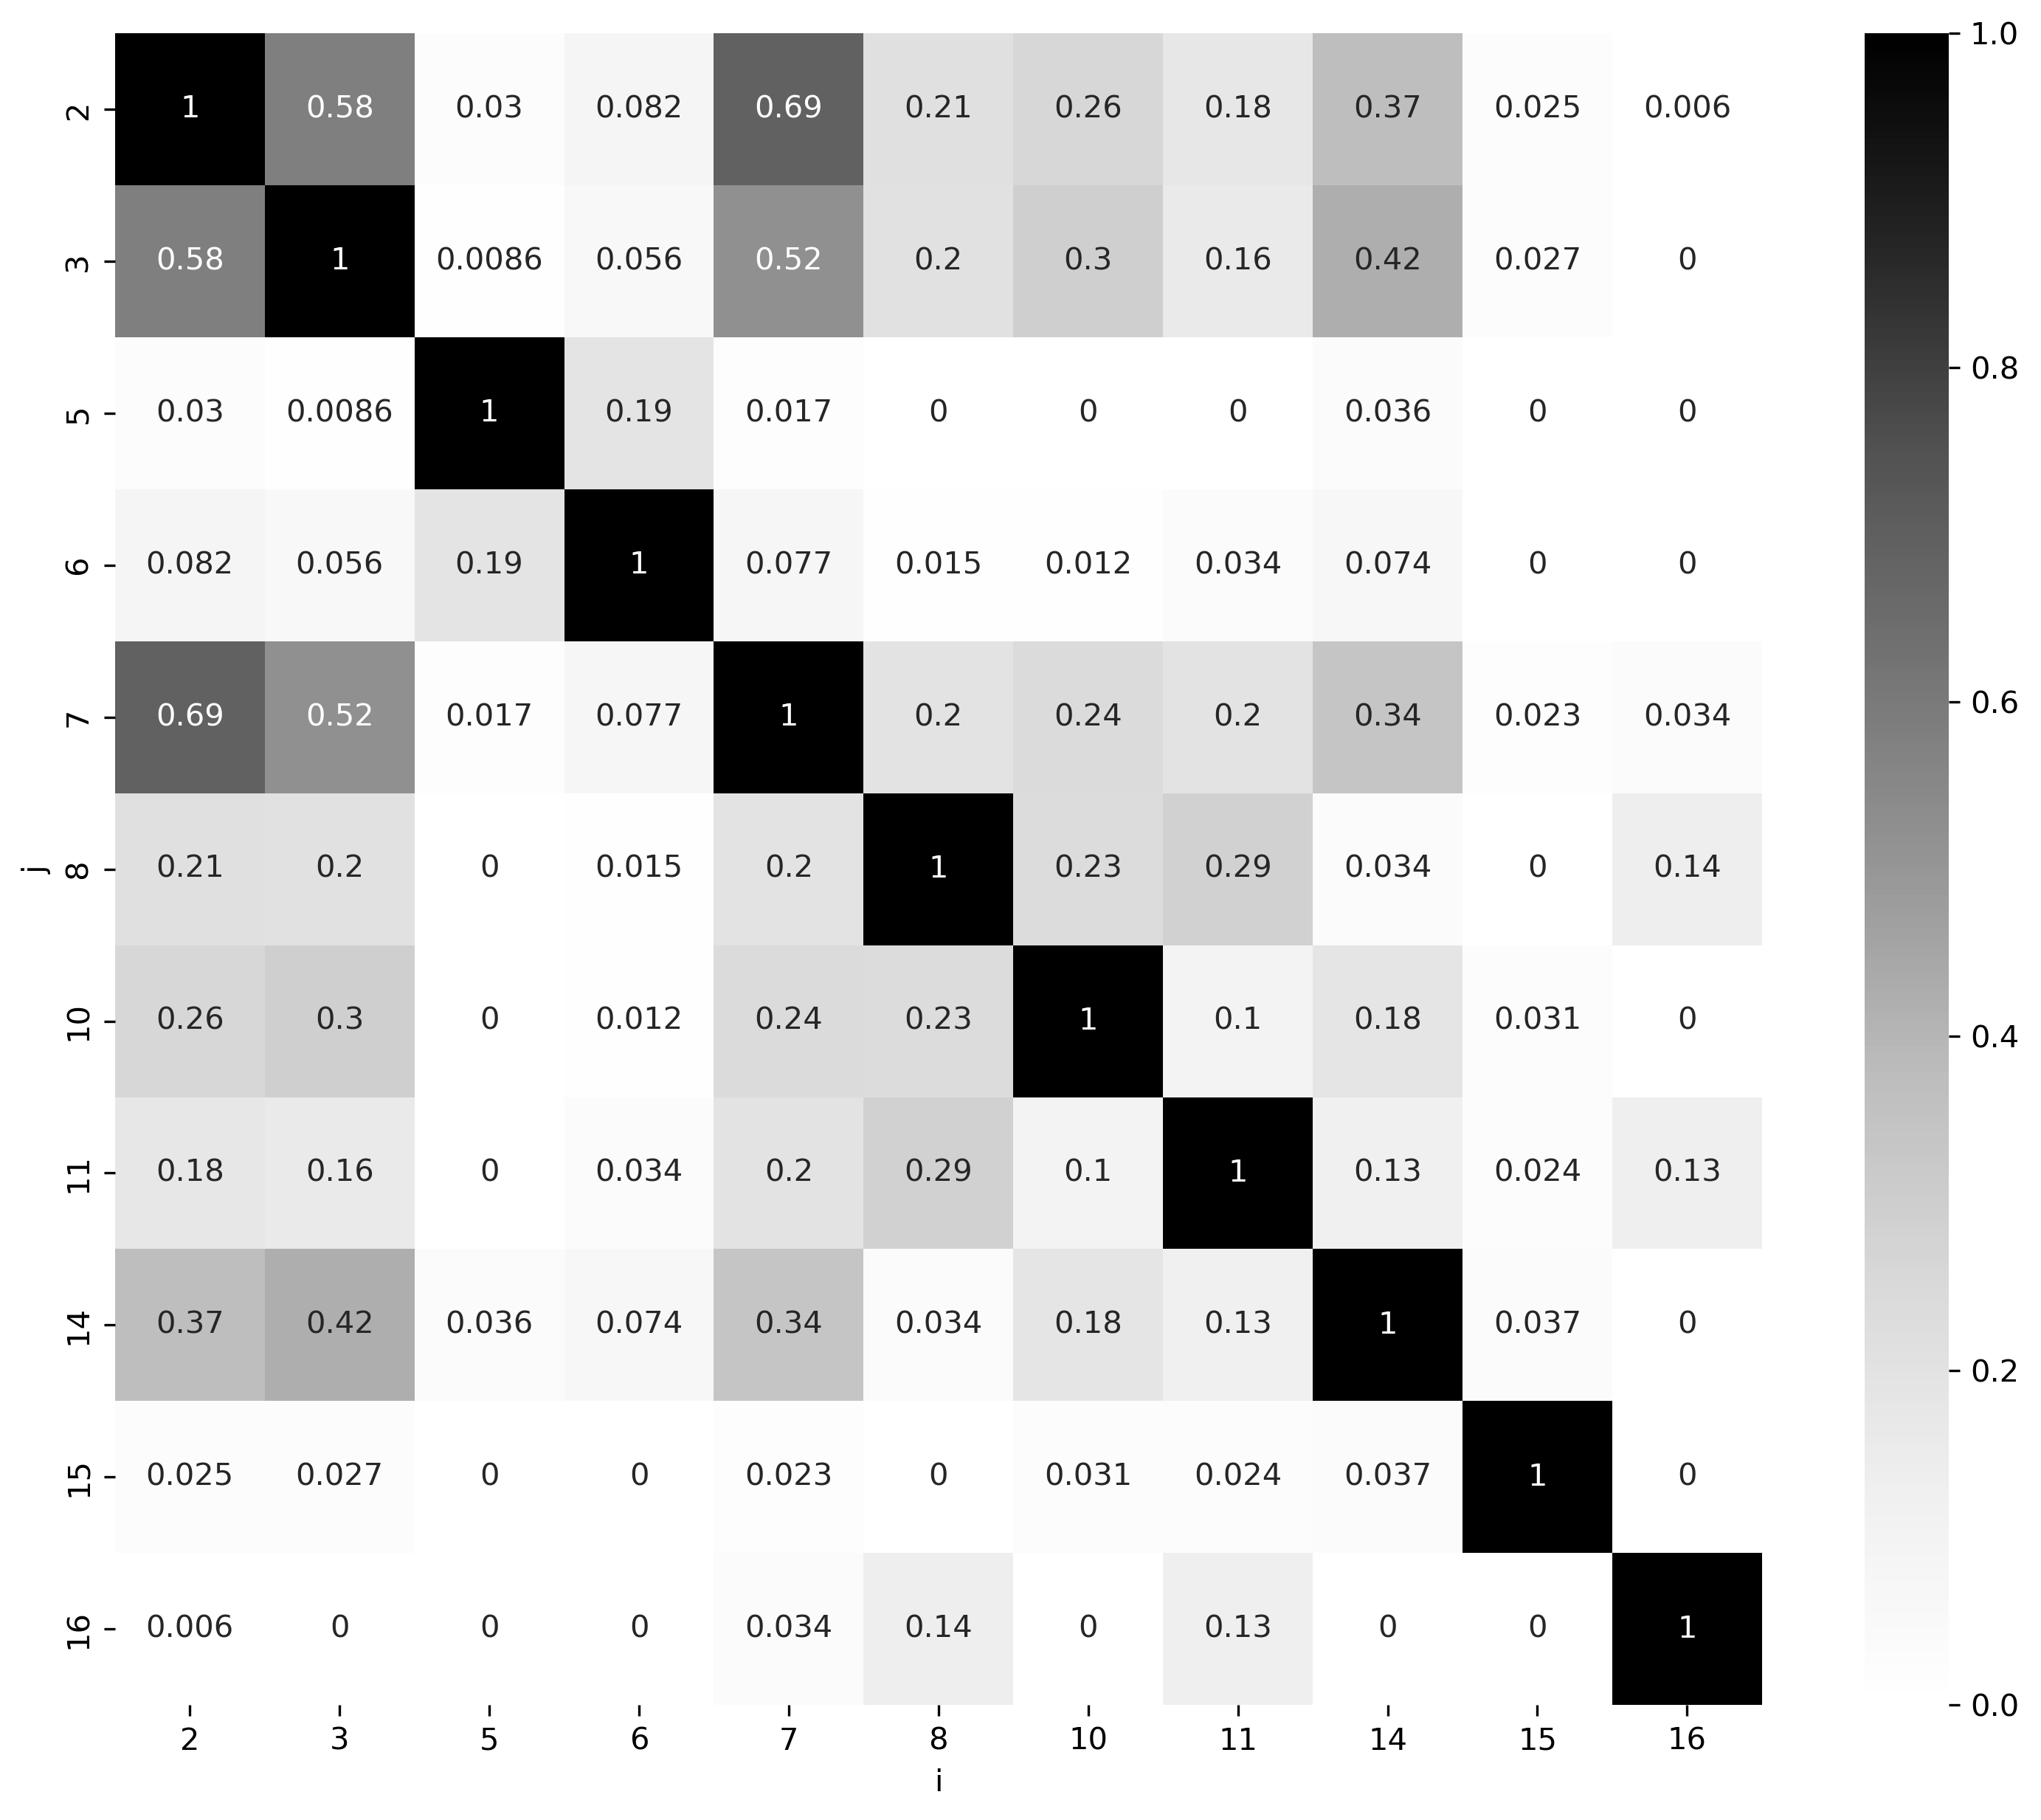

In [31]:
for metric in ["jacccard"]:
    heatmap = jaccard_df.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
    sns.heatmap(heatmap, cmap="Greys", vmin=0.0, vmax=1.00, annot=True)
    print(metric)
    plt.show()